In [1]:
import anndata
import numpy as np

import spateo as st

import plotly.express as px

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jingzehua/opt/anaconda3/envs/spateo/lib/python3.8/site-packages/spaghetti-1.6.5-py3.8.egg/spaghetti/network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


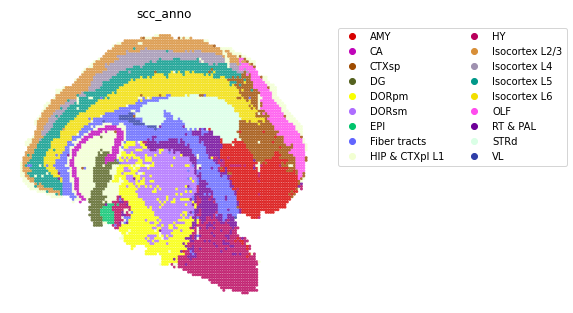

In [2]:
adata_bin60 = anndata.read("../adata_bin60_cluster.h5ad")
st.pl.space(adata_bin60, color=['scc_anno'], pointsize=0.2, show_legend="upper left")

In [3]:
#Extract spatial domains from clusters.
#Transfer domain annotation to higher resolution anndata object (optional).

adata_bin30 = anndata.read("../adata_bin30_concave_hull_ver.h5ad")
adata_bin30.obsm['bin30_spatial'] = adata_bin30.obsm['spatial']//30
st.dd.set_domains(
    adata_high_res=adata_bin30,
    adata_low_res=adata_bin60,
    bin_size_high=30,
    bin_size_low=60,
    cluster_key="scc_anno",
    k_size=1.8,
    min_area=16,
)

|-----> Generate the cluster label image with `gen_cluster_image`.
|-----> Set up the color for the clusters with the tab20 colormap.
|-----> Saving integer labels for clusters into adata.obs['cluster_img_label'].
|-----> Prepare a mask image and assign each pixel to the corresponding cluster id.
|-----> Iterate through each cluster and identify contours with `extract_cluster_contours`.
|-----> Get selected areas in labels:14.
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Get selected areas in labels:10.
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Get selected areas in labels:8.
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Get selected areas in labels:9.
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.
|-----> Get selected areas in labels:6.
|-----> Close cluster morphology.
|-----> Remove sma

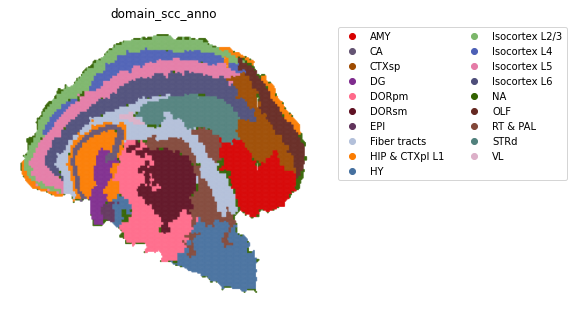

In [4]:
#Transfered spatial domain
st.pl.space(adata_bin30, color=['domain_scc_anno'], pointsize=0.2, show_legend="upper left")

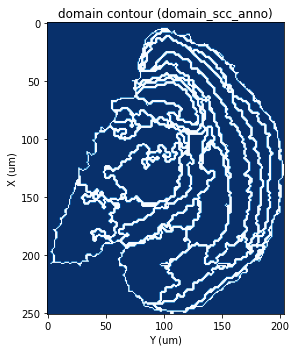

In [5]:
#contour spatial domains
st.pl.spatial_domains(adata_bin30, bin_size=30, label_key="domain_scc_anno")

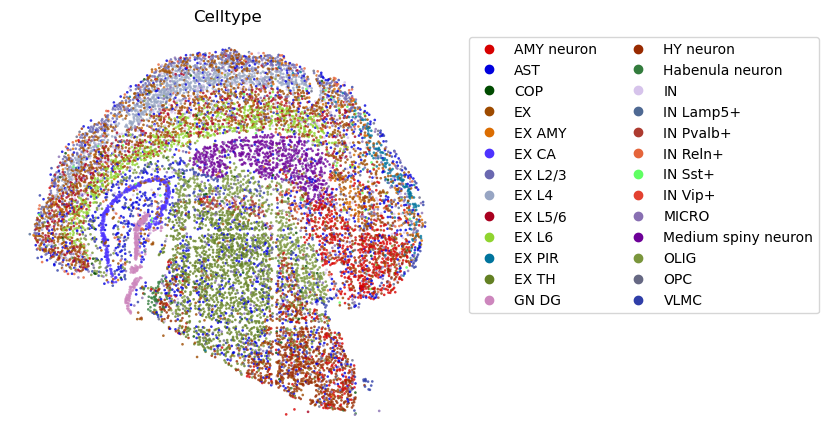

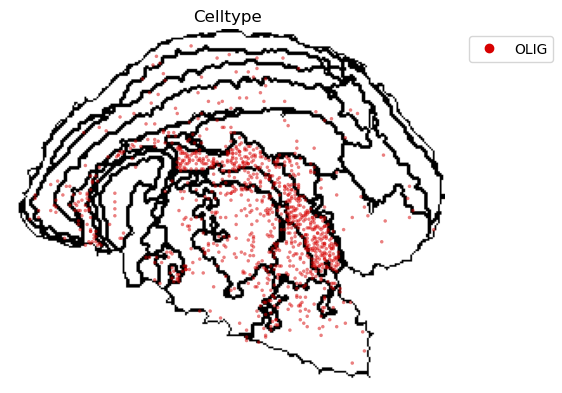

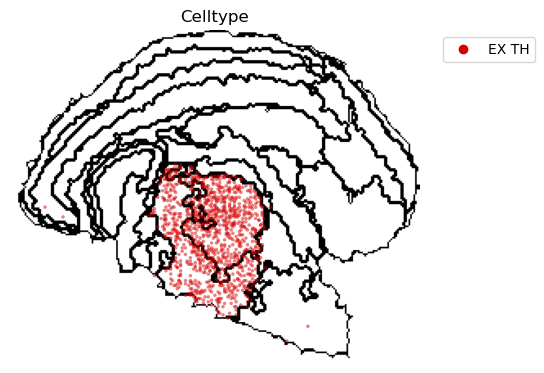

In [12]:
#cross analysis between domains and segmented cells

adata_cellbin = anndata.read("../adata_X_labels_cluster.h5ad")
adata_cellbin.obsm['bin30_spatial'] = adata_cellbin.obsm['spatial']//30
adata_cellbin = st.io.read_image(adata_cellbin,filename='plot_contour_img.png',img_layer="layer1",slice="slice1", scale_factor=1)

st.pl.space(adata_cellbin, color=['Celltype'], pointsize=0.1, show_legend="upper left")

st.pl.space(adata_cellbin[adata_cellbin.obs['Celltype'] == "OLIG",:],
            space="bin30_spatial",color=['Celltype'],
            pointsize=0.05, alpha=0.5, boundary_width=0, show_legend="upper left",
            img_layers = "layer1", slices="slice1")

st.pl.space(adata_cellbin[adata_cellbin.obs['Celltype'] == "EX TH",:],
            space="bin30_spatial",color=['Celltype'],
            pointsize=0.05, alpha=0.5, boundary_width=0, show_legend="upper left",
            img_layers = "layer1", slices="slice1")

In [7]:
#Extract an area of interest for soft gridding

cluster_label_image_lowres = st.dd.gen_cluster_image(adata_bin30, bin_size=1, spatial_key="bin30_spatial", cluster_key='domain_scc_anno', show=False)
cluster_label_list = np.unique(adata_bin30[np.isin(adata_bin30.obs['domain_scc_anno'],
                                                   ['Isocortex L2/3','Isocortex L4','Isocortex L5']), :].obs["cluster_img_label"])
contours, cluster_image_close, cluster_image_contour = st.dd.extract_cluster_contours(cluster_label_image_lowres, cluster_label_list, bin_size=1, k_size=6, show=False)

px.imshow(cluster_image_contour)

|-----> Set up the color for the clusters with the tab20 colormap.
|-----> Saving integer labels for clusters into adata.obs['cluster_img_label'].
|-----> Prepare a mask image and assign each pixel to the corresponding cluster id.
|-----> Get selected areas in labels:[11 12 13].
|-----> Close cluster morphology.
|-----> Remove small region.
|-----> Extract contours.


|-----> Total iteration: 1547
|-----> Total iteration: 1601


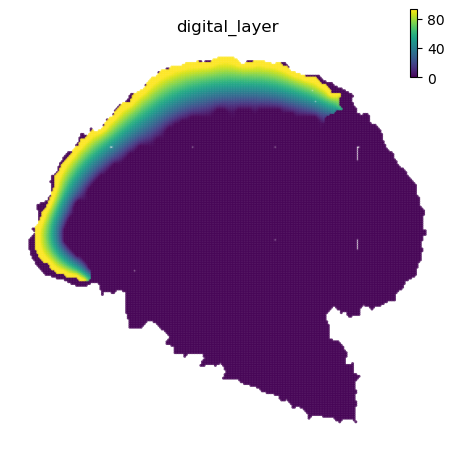

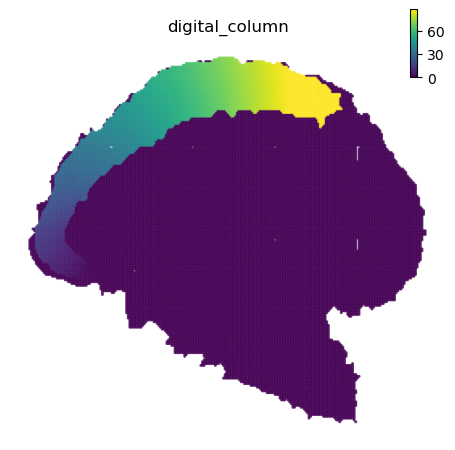

In [8]:
#user input to specify a gridding direction
pnt_xY = (81,38)
pnt_xy = (87,42)
pnt_Xy = (167,187)
pnt_XY = (183,195)

#digitize the area of interest
st.dd.digitize(adata=adata_bin30,
     ctrs=contours,
     ctr_idx=0,
     pnt_xy=pnt_xy,
     pnt_xY=pnt_xY,
     pnt_Xy=pnt_Xy,
     pnt_XY=pnt_XY,
     spatial_key="bin30_spatial"
)

st.pl.space(adata_bin30, color=['digital_layer'], pointsize=0.2, show_legend="upper left")
st.pl.space(adata_bin30, color=['digital_column'], pointsize=0.2, show_legend="upper left")

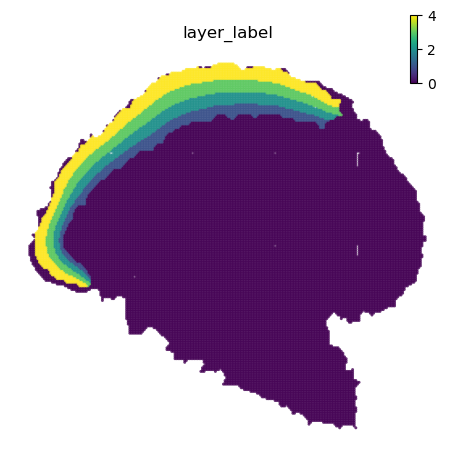

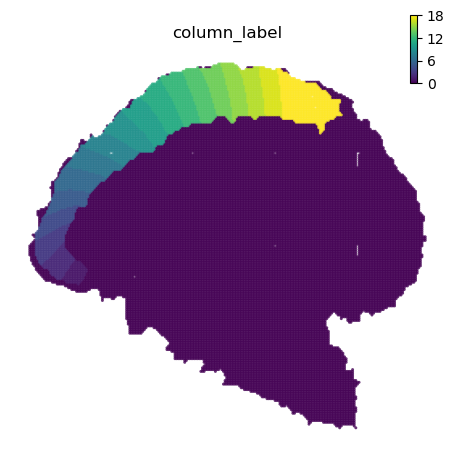

In [9]:
#soft gridding
st.dd.soft_gridding(
    adata=adata_bin30,
    layer_num=4,
    column_num=20,
    layer_border_width=2.5,
    column_border_width=0.5,
)
st.pl.space(adata_bin30, color=['layer_label'], pointsize=0.2, show_legend="upper left")
st.pl.space(adata_bin30, color=['column_label'], pointsize=0.2, show_legend="upper left")

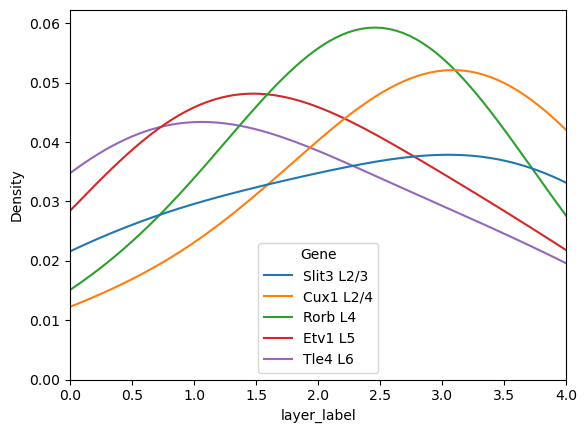

In [10]:
gene_dict = {'L2/3': ['Slit3'],
             'L2/4': ['Cux1'],
             'L4': ['Rorb'],
             'L5': ['Etv1'],
             'L6': ['Tle4']}
df = st.dd.digi_exp_plot(adata_bin30, gene_dict, region_key="layer_label")

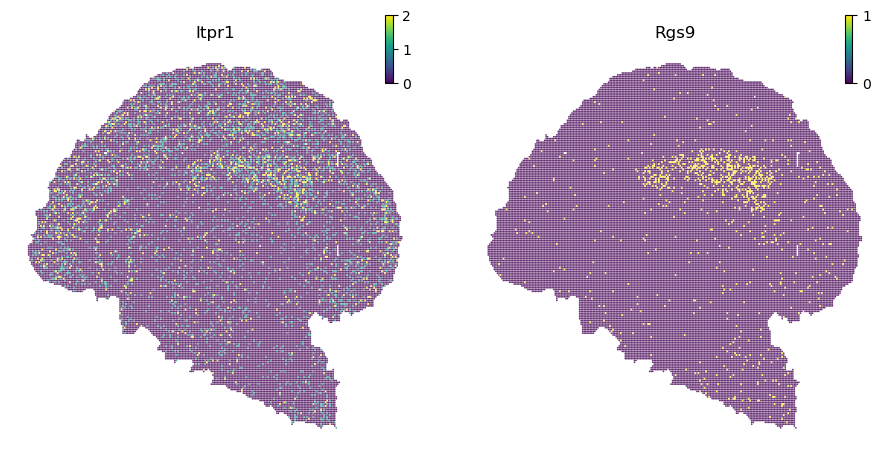

In [17]:
st.pl.space(adata_bin30,genes=['Sgc', 'Rgs9'])